In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [27]:
class AdaptiveLinearNeuron(object):

    def __init__(self, rate=0.01, niter=10):
        self.rate = rate # Темп обучения (от О до 1)
        self.niter = niter # Количество проходов

    def fit(self, X, y):
        self.weight = np.zeros(1 + X.shape[1]) # w : одномерный массив -
        self.cost = []
        for _ in range(self.niter):
            output = self.net_input(X)
            errors = y - output
            self.weight[1:] += self.rate * X.T.dot(errors)
            self.weight[0] += self.rate * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [28]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
X = iris_df.iloc[0:100,[0,2]].values
Y = iris_df.iloc[0:100,4].values
Y = np.where(Y=='setosa',-1,1)

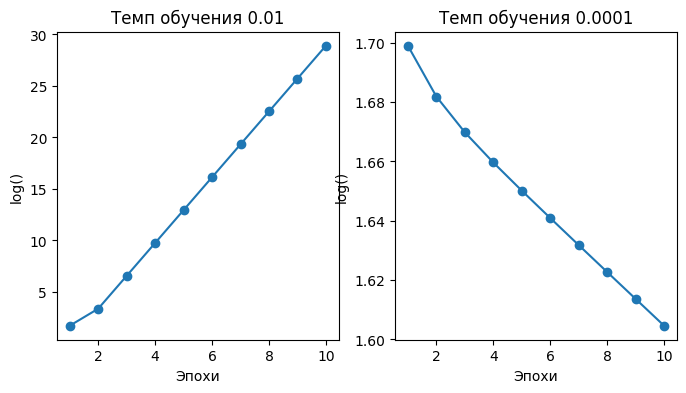

In [29]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
aln1 = AdaptiveLinearNeuron(0.01,10).fit(X,Y)
ax[0].plot(range(1,len(aln1.cost)+1),np.log10(aln1.cost),marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log()')
ax[0].set_title('Темп обучения 0.01')

aln2 = AdaptiveLinearNeuron(0.0001,10).fit(X,Y)
ax[1].plot(range(1,len(aln2.cost)+1),np.log10(aln2.cost),marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log()')
ax[1].set_title('Темп обучения 0.0001')

plt.show()

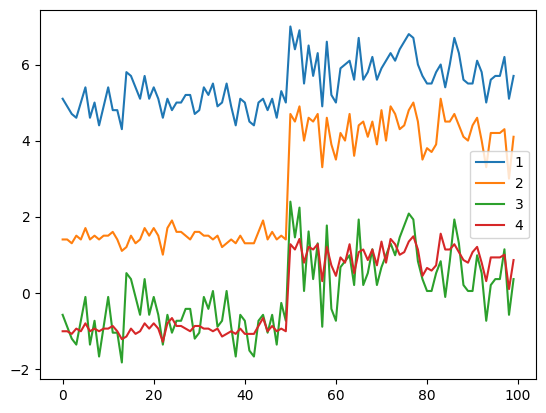

In [30]:
# Стандартизуем обучающую выборку
X_std = np.copy(X)
X_std[:,0] =  (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

plt.plot(X)
plt.plot(X_std)
plt.legend(['1','2','3','4'])
plt.show()

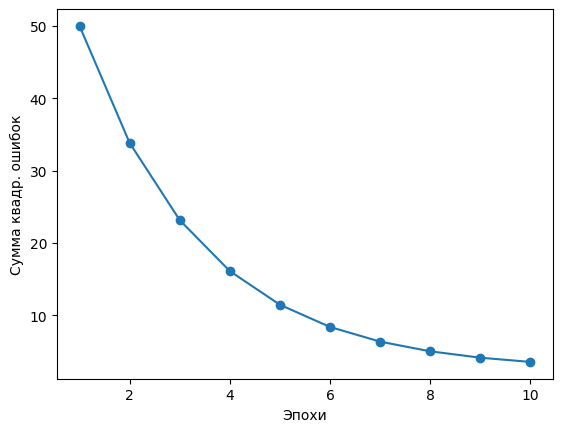

In [34]:
aln = AdaptiveLinearNeuron(0.01,10).fit(X_std,Y)
plt.plot(range(1,len(aln.cost)+1),aln.cost,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадр. ошибок')
plt.show()

In [32]:
# Визуализация разделительной границы
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
# Настро ить генерато р маркеров и палитру
    markers = ('s', 'x', ' o', '^', 'v')
    colors = ( 'red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Вывести поверхность решения
    xl_min, xl_max = X[:, 0] .min() - 1, X[:, 0] .max() + 1
    x2_min, x2_max = X[:, 1] .min() - 1, X[:, 1] .max() + 1
    xxl, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xxl.shape)
    plt.contourf(xxl, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xxl.min (), xxl.max())
    plt.ylim(xx2.min(), xx2.max())
    # По казать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            color=cmap(idx), marker=markers[idx], label=cl)

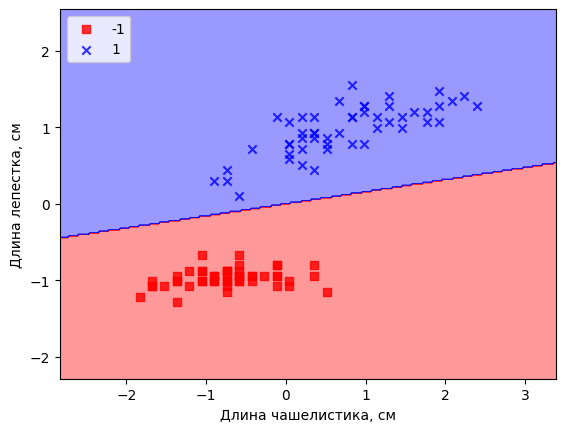

In [39]:
# Нарисовать картинку
plot_decision_regions(X_std, Y, classifier=aln)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Длина лепестка, см')
plt.legend(loc='upper left')
plt.show()

In [40]:
# i1 = [-1.5, -0.75]
i1 = [0.25, 1.1]
Rl = aln.predict(i1)
if (Rl == 1):
    print( 'Rl= Вид Iris setosa' )
else:
    print( 'Rl= Вид Iris versicolor')

Rl= Вид Iris setosa
